In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#支持向量机会把训练数据映射到叫做决策空间（decision space）的多维空间


In [8]:
x = np.array([[2,3],[1.9,7],[3,8],[2,1],[4,10],[3,8],[6.7,4.9],[7.1,7.4],[8.4,5.9],[8,9],[9,9]])
x

array([[  2. ,   3. ],
       [  1.9,   7. ],
       [  3. ,   8. ],
       [  2. ,   1. ],
       [  4. ,  10. ],
       [  3. ,   8. ],
       [  6.7,   4.9],
       [  7.1,   7.4],
       [  8.4,   5.9],
       [  8. ,   9. ],
       [  9. ,   9. ]])

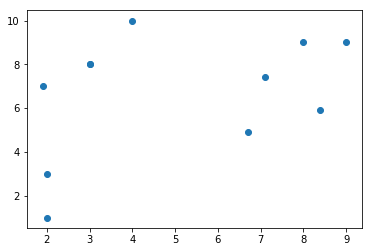

In [9]:
plt.scatter(x[:,0],x[:,1])
plt.show()

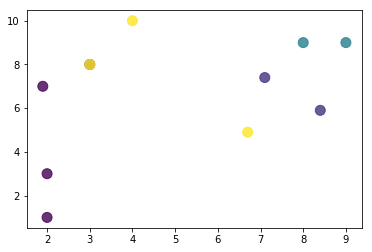

In [10]:
#alpha控制透明度,s【size】控制大小，c用于设置颜色序列，相同的序列颜色相同
y = [2] * 4 + [9] * 3 + [3] * 2 +[5]*2
plt.scatter(x[:,0],x[:,1],alpha=0.8,s=100,c=y)
plt.show()

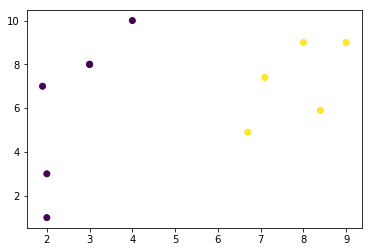

In [11]:
y = [2] * 6 + [9] * 5
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

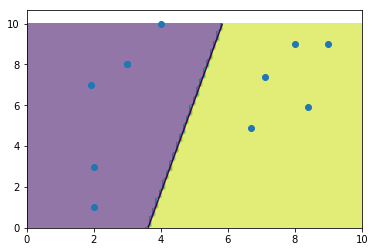

In [25]:
from sklearn.svm import SVC
#接下来使用svc来对数据分类，使用SVC构造函数定义模型，使用线性内容。然后调用fit函数，传入训练集作为参数。用decision_function绘制
#决策边界。
y = [2] * 6 + [9] * 5

svc = SVC(kernel='linear').fit(x,y)
X,Y = np.mgrid[0:10:100j,0:10:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
#contour外形、轮廓，contourf用于设置不同边界下面板的背景
plt.contourf(X,Y,Z>0,alpha=0.6)
#contour用来设置分界线的信息
plt.contour(X,Y,Z,levels=[0])
plt.scatter(x[:,0],x[:,1])
plt.show()

## 正则化是一个与SVC算法相关的概念，用参数C【castigate】来设置，C值较小表示计算间隔时，将分界线两侧大量甚至全部的数据点都考虑在内
## 泛化能力强，C值较大，表示只考虑分界线附近的数据点，泛化能力弱。若不指定C，其默认值是1.可以通过support_vectors来获取参与
## 计算间隔的数据点，并高亮显示。

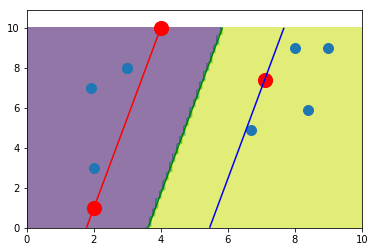

In [29]:
from sklearn.svm import SVC
#接下来使用svc来对数据分类，使用SVC构造函数定义模型，使用线性内容。然后调用fit函数，传入训练集作为参数。
#用decision_function绘制决策边界。
y = [2] * 6 + [9] * 5

svc = SVC(kernel='linear').fit(x,y)
X,Y = np.mgrid[0:10:100j,0:10:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
#contour外形、轮廓，contourf用于设置不同边界下面板的背景
plt.contourf(X,Y,Z>0,alpha=0.6)
#contour用来设置分界线的信息
plt.contour(X,Y,Z,levels=[-1,0,1],colors=['r','g','b'],linestyle=['--','-','--'])
plt.scatter(x[:,0],x[:,1],s=100)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=200,color='red')
plt.show()

## 尝试把惩罚系数C调低一些

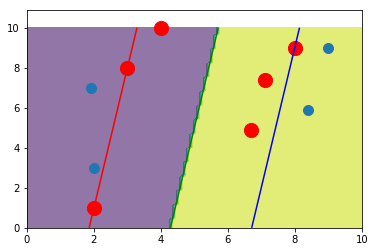

In [32]:
from sklearn.svm import SVC
#接下来使用svc来对数据分类，使用SVC构造函数定义模型，使用线性内容。然后调用fit函数，传入训练集作为参数。
#用decision_function绘制决策边界。
y = [2] * 6 + [9] * 5
svc = SVC(kernel='linear',C=0.05).fit(x,y)
X,Y = np.mgrid[0:10:100j,0:10:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
#contour外形、轮廓，contourf用于设置不同边界下面板的背景
plt.contourf(X,Y,Z>0,alpha=0.6)
#contour用来设置分界线的信息
plt.contour(X,Y,Z,levels=[-1,0,1],colors=['r','g','b'],linestyle=['--','-','--'])
plt.scatter(x[:,0],x[:,1],s=100)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=200,color='red')
plt.show()

## 非线性的SVC

### 可以使用多项式内核曲线来把决策空间分成两块。多项式的次数使用degree选项指定

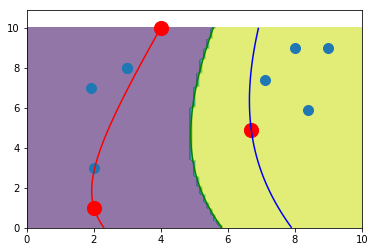

In [35]:
from sklearn.svm import SVC
#接下来使用svc来对数据分类，使用SVC构造函数定义模型，使用线性内容。然后调用fit函数，传入训练集作为参数。
#用decision_function绘制决策边界。
y = [2] * 6 + [9] * 5
svc = SVC(kernel='poly',C=0.05,degree=2).fit(x,y)
X,Y = np.mgrid[0:10:100j,0:10:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
#contour外形、轮廓，contourf用于设置不同边界下面板的背景
plt.contourf(X,Y,Z>0,alpha=0.6)
#contour用来设置分界线的信息
plt.contour(X,Y,Z,levels=[-1,0,1],colors=['r','g','b'],linestyle=['--','-','--'])
plt.scatter(x[:,0],x[:,1],s=100)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=200,color='red')
plt.show()

### 另一种非线性的内核称为径向基【radial basis function,RBF】,这种内核生成的分割面尝试把数据集中的各个数据分到延径向方向
### 分布的不同区域

In [ ]:
## gamma值和sigma值得平方成反比

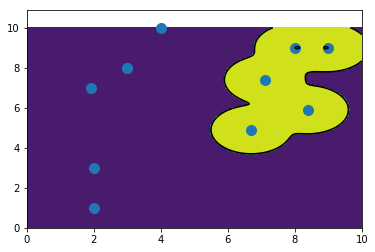

In [48]:
from sklearn.svm import SVC
#接下来使用svc来对数据分类，使用SVC构造函数定义模型，使用线性内容。然后调用fit函数，传入训练集作为参数。
#用decision_function绘制决策边界。
y = [2] * 6 + [9] * 5
svc = SVC(kernel='rbf',C=1,gamma=3).fit(x,y)
X,Y = np.mgrid[0:10:200j,0:10:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
#contour外形、轮廓，contourf用于设置不同边界下面板的背景
plt.contourf(X,Y,Z>0)
#contour用来设置分界线的信息
plt.contour(X,Y,Z,levels=[-1,0,1],colors=['k','k','k'],linestyle=['--','-','--'])
plt.scatter(x[:,0],x[:,1],s=100)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=200,facecolor='none')
plt.show()

## 绘制SVM分类器对iris数据集的分类效果图

### 前面的分类只有两个，现在我们扩展到三个类别。

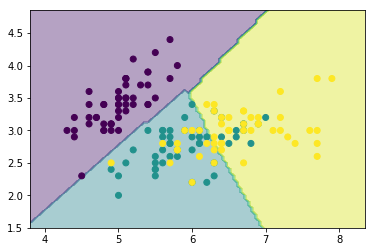

In [63]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[:,:2]
y = iris.target
h = 0.05
svc = SVC(kernel='linear',C=1.0).fit(x,y)
xmin,xmax = x[:,0].min()-0.5,x[:,0].max()+0.5
ymin,ymax = x[:,1].min()-0.5,x[:,1].max()+0.5
X,Y = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,X,color='k',levels=[0])
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

### 使用多项式内核来划分

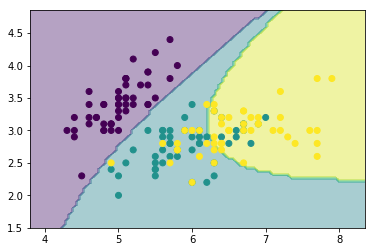

In [65]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[:,:2]
y = iris.target
h = 0.05
svc = SVC(kernel='poly',C=1.0,degree=3).fit(x,y)
xmin,xmax = x[:,0].min()-0.5,x[:,0].max()+0.5
ymin,ymax = x[:,1].min()-0.5,x[:,1].max()+0.5
X,Y = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,X,color='k',levels=[0])
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

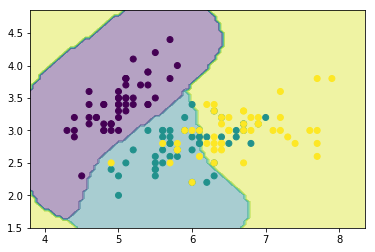

In [66]:
### 使用RBF径向基内核
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[:,:2]
y = iris.target
h = 0.05
svc = SVC(kernel='rbf',C=1.0,gamma=3).fit(x,y)
xmin,xmax = x[:,0].min()-0.5,x[:,0].max()+0.5
ymin,ymax = x[:,1].min()-0.5,x[:,1].max()+0.5
X,Y = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z,alpha=0.4)
plt.contour(X,Y,X,color='k',levels=[0])
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

## 支持向量回归

#### SVC的扩展可以解决回归问题，这种方法叫做SVR Support Vector Regression支持向量回归

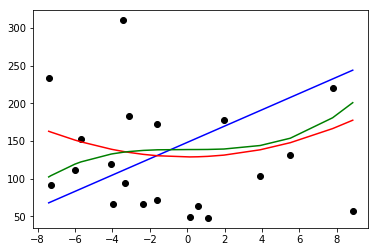

In [2]:
### 使用Diabetes数据集，该数据集有10个生理特性，使用其中的3个。使用一个线性，2个非线性内核来做预测。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.svm import SVR
diabetes = load_diabetes()
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

x0_test = x_test[:,2]
x0_train = x_train[:,2]

x0_test.sort(axis=0)
x0_test = x0_test*100
x0_train = x0_train*100
svr1 = SVR(kernel='linear',C=50)
svr2 = SVR(kernel='poly',C=50,degree=2)
svr3 = SVR(kernel='poly',C=50,degree=3)

svr1.fit(x0_train.reshape(-1, 1),y_train)
svr2.fit(x0_train.reshape(-1, 1),y_train)
svr3.fit(x0_train.reshape(-1, 1),y_train)

y1 = svr1.predict(x0_test.reshape(-1, 1))
y2 = svr2.predict(x0_test.reshape(-1, 1))
y3 = svr3.predict(x0_test.reshape(-1, 1))

plt.scatter(x0_test,y_test,color='k')
plt.plot(x0_test,y1,color='b')
plt.plot(x0_test,y2,color='r')
plt.plot(x0_test,y3,color='g')
plt.show()
